In [1]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_csv_agent
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
import os
from langchain_google_vertexai import VertexAI
import pandas as pd

In [2]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "C:\\Users\\gopesh.r\\Downloads\\LLA-J\\lumen-b-ctl-047-e2aeb24b0ea0.json"

In [3]:
model = VertexAI(model_name='gemini-1.5-pro-preview-0409', temperature=0.5, max_output_tokens=8192, streaming= True)
# agent = create_csv_agent(
#     ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613"),
#     "Jamaica_partial_cleaned.csv",
#     verbose=True,
#     agent_type=AgentType.OPENAI_FUNCTIONS,
# )

In [4]:
df = pd.read_csv('C:\\Users\\gopesh.r\\Downloads\\LLA-J\\Jamaica_partial_cleaned.csv')

In [5]:
agent = create_pandas_dataframe_agent(
        model, df, verbose=True, return_intermediate_steps= True
        )

In [6]:
response = agent.invoke("In what day did most postpaid churn happen in march?")



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include March dates and then find the day with the maximum Postpaid Churn.
Action: python_repl_ast
Action Input: ```python
import pandas as pd
df['Datetime'] = pd.to_datetime(df['Datetime'])
march_df = df[df['Datetime'].dt.month == 3]
print(march_df.loc[march_df['Postpaid Churn'].idxmax()]['Datetime'].strftime('%Y-%m-%d'))
```2024-03-31
Thought: I now know the final answer
Final Answer: The day with the most postpaid churn in March was March 31st, 2024. 


> Finished chain.


In [7]:
print(response['output'])

The day with the most postpaid churn in March was March 31st, 2024.


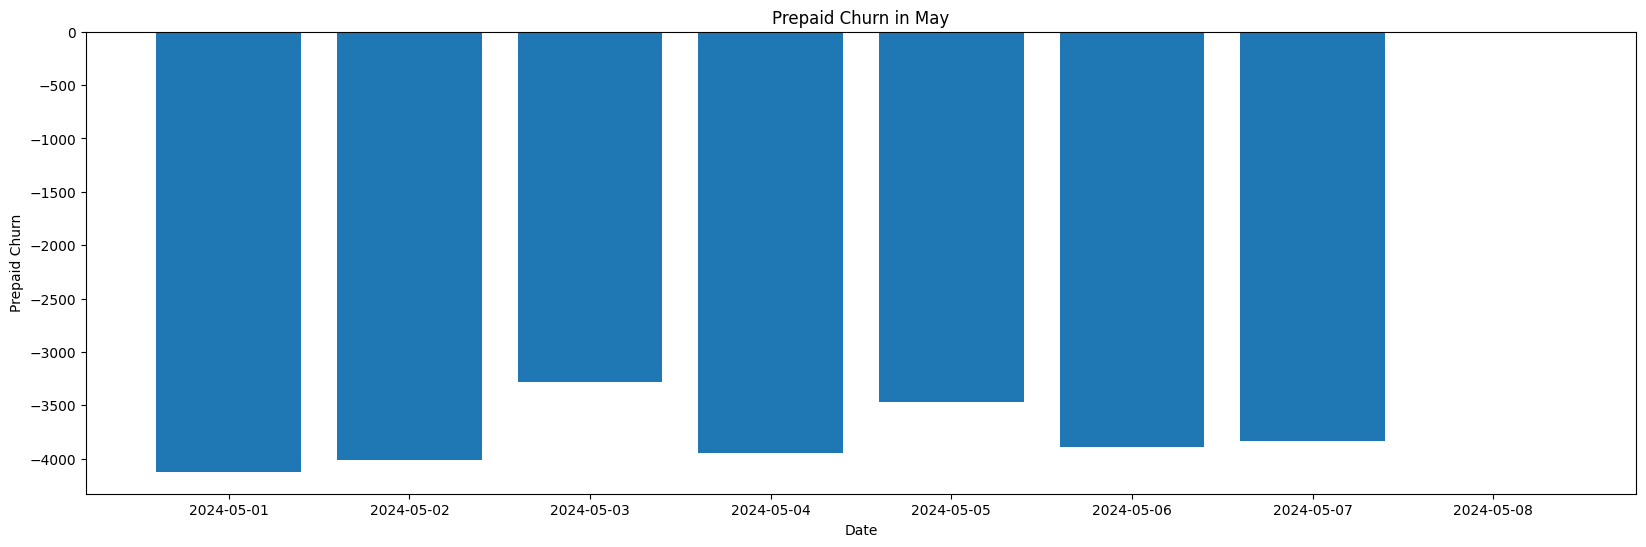

In [75]:
import matplotlib.pyplot as plt
df['Datetime'] = pd.to_datetime(df['Datetime'])
df_may = df[df['Datetime'].dt.month == 5]
plt.figure(figsize=(20, 6))  # Adjust width and height as desired
plt.bar(df_may['Datetime'], df_may['Prepaid Churn'])
plt.xlabel('Date')
plt.ylabel('Prepaid Churn')
plt.title('Prepaid Churn in May')
plt.show()